(appendices/MBP3_RNA)=
# RNA and Protein Synthesis

# Introduction

In the previous chapter on [DNA and Transcription](https://github.com/rebelford/DataChem2025Book/blob/main/content/appendices/MBP2_Genes.ipynb), we explored how DNA serves as the master template for life and how its genetic information is copied into RNA through the process of transcription. In this next step of gene expression, we turn our attention to translation, the process by which the sequence of nucleotides in RNA is converted into a sequence of amino acids that form a protein. This process is universal across all life forms and lies at the heart of biology: proteins are the workhorses of the cell, catalyzing biochemical reactions, transmitting signals, and providing structural integrity.

Once a messenger RNA (mRNA) molecule reaches the cytoplasm, it serves as a blueprint for protein construction. The ribosome reads the mRNA three nucleotides at a time; each triplet, called a codon, specifies a particular amino acid. Specialized adaptor molecules called transfer RNAs (tRNAs) act as translators between the language of nucleotides and the language of amino acids. Each tRNA carries one amino acid and contains an anticodon that pairs precisely with a complementary codon on the mRNA strand.

Protein assembly takes place on a ribosome, a large molecular complex made of ribosomal RNA (rRNA) and proteins. As the ribosome moves along the mRNA, it links amino acids together by forming peptide bonds in the exact order dictated by the genetic code. Translation proceeds in three main stages: initiation, elongation, and termination.

The resulting chain of amino acids, known as a polypeptide, is not yet functional. It must fold into a specific three-dimensional shape to become an active protein. Some proteins fold spontaneously, while others require the help of chaperone proteins. Many also undergo post-translational modifications—such as cleavage, phosphorylation, or glycosylation—that fine-tune their activity, stability, and cellular destination.


# 1. Codons and Amino Acids

The ribosome reads the messenger RNA (mRNA) three nucleotides at a time. Each three-base sequence, called a codon, specifies one amino acid to be added to the growing polypeptide chain. Because RNA uses four bases—adenine (A), uracil (U), cytosine (C), and guanine (G)—the number of possible codons is:

$
4^3 = 64
$


This means that there are 64 unique three-base combinations. Of these, 61 codons code for amino acids, while 3 codons (UAA, UAG, UGA) act as “stop” signals that mark the end of translation. The codon AUG serves as the start codon, signaling both the beginning of a protein and the amino acid methionine.

Instead of memorizing a static codon table, we can use Python to generate and explore the entire genetic code programmatically. To do this, we’ll introduce a new library—Biopython.

## BioPython
[**Biopython**](https://biopython.org) is a Python library designed for working with biological data such as DNA, RNA, and protein sequences. If you have not installed BioPython, activate your virtual environment and run the following command from the command line:
```bash
conda install -c conda-forge biopython
```
BioPython provides access to codon tables, translation tools, and many utilities for analyzing sequence data.For example, it can translate RNA into amino acids using the same logic the ribosome follows inside a cell.
Let’s begin by generating all 64 possible codons and verifying that number mathematically.

### Activity 1 — Generating the 64 Codons
**What’s happening?**

* `itertools.product(bases, repeat=3)` systematically generates every combination of 3 RNA bases.
* We join them into strings (e.g., `"AUG"`, `"UUC"`, `"GGC"`).
* The total count confirms $4^3 = 64$.


In [1]:

# Generate all possible codons (4^3 = 64)
from itertools import product

bases = ['A', 'U', 'G', 'C']
codons = [''.join(p) for p in product(bases, repeat=3)]

print(f"Number of possible codons: {len(codons)}")
print(codons[:16])  # show the first 16


Number of possible codons: 64
['AAA', 'AAU', 'AAG', 'AAC', 'AUA', 'AUU', 'AUG', 'AUC', 'AGA', 'AGU', 'AGG', 'AGC', 'ACA', 'ACU', 'ACG', 'ACC']


### Activity 2 — Exploring the Genetic Code with BioPython

`CodonTable` gives us access to real biological codon mappings usig one-letter amino acid codes (like `"M"` for methionine).

#### Amino Acid: Codon Dictionary
Using BioPython, we can create a dictionary that maps each amino acid to its corresponding codons. This will help us understand which codons code for which amino acids. Use the one letter symbol of the amino acid for the key, and a list of the codons that code for it as the value. 



In [2]:
from Bio.Data import CodonTable
from collections import defaultdict

# Get the standard RNA codon table
standard_table = CodonTable.unambiguous_rna_by_name["Standard"]

# Build dictionary: amino acid (1-letter code) → list of codons
amino_to_codons = defaultdict(list)
for codon, amino in standard_table.forward_table.items():
    amino_to_codons[amino].append(codon)

amino_to_codons

defaultdict(list,
            {'F': ['UUU', 'UUC'],
             'L': ['UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG'],
             'S': ['UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC'],
             'Y': ['UAU', 'UAC'],
             'C': ['UGU', 'UGC'],
             'W': ['UGG'],
             'P': ['CCU', 'CCC', 'CCA', 'CCG'],
             'H': ['CAU', 'CAC'],
             'Q': ['CAA', 'CAG'],
             'R': ['CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
             'I': ['AUU', 'AUC', 'AUA'],
             'M': ['AUG'],
             'T': ['ACU', 'ACC', 'ACA', 'ACG'],
             'N': ['AAU', 'AAC'],
             'K': ['AAA', 'AAG'],
             'V': ['GUU', 'GUC', 'GUA', 'GUG'],
             'A': ['GCU', 'GCC', 'GCA', 'GCG'],
             'D': ['GAU', 'GAC'],
             'E': ['GAA', 'GAG'],
             'G': ['GGU', 'GGC', 'GGA', 'GGG']})

#### Amino Acid to SMILES dictionary
Using RDKit create a python dictionary of amino acids using their one-letter code as the key and the value being a tuple of their names and SMILES representations. 

In [16]:
from rdkit import Chem

amino_data = {
    "G": ("Glycine", "NCC(=O)O"),
    "A": ("Alanine", "CC(C(=O)O)N"),
    "V": ("Valine", "CC(C)C(C(=O)O)N"),
    "L": ("Leucine", "CC(C)CC(C(=O)O)N"),
    "I": ("Isoleucine", "CC(C)C(C(=O)O)N"),  # same backbone; differ in branch
    "M": ("Methionine", "CSCC(C(=O)O)N"),
    "F": ("Phenylalanine", "C1=CC=C(C=C1)CC(C(=O)O)N"),
    "W": ("Tryptophan", "C1=CC=C2C(=C1)C=CN2CC(C(=O)O)N"),
    "Y": ("Tyrosine", "C1=CC(=CC=C1CC(C(=O)O)N)O"),
    "S": ("Serine", "OCC(C(=O)O)N"),
    "T": ("Threonine", "CC(O)C(C(=O)O)N"),
    "C": ("Cysteine", "C([C@@H](C(=O)O)N)S"),
    "N": ("Asparagine", "NC(=O)CC(C(=O)O)N"),
    "Q": ("Glutamine", "C(CC(=O)N)[C@@H](C(=O)O)N"),
    "D": ("Aspartic acid", "OC(=O)CC(C(=O)O)N"),
    "E": ("Glutamic acid", "OC(=O)CCC(C(=O)O)N"),
    "K": ("Lysine", "NCCCC(C(=O)O)N"),
    "R": ("Arginine", "N=C(N)NCCC(C(=O)O)N"),
    "H": ("Histidine", "C1=CN=CN1CC(C(=O)O)N"),
    "P": ("Proline", "C1C[C@H](NC1)C(=O)O")
}
amino_data

{'G': ('Glycine', 'NCC(=O)O'),
 'A': ('Alanine', 'CC(C(=O)O)N'),
 'V': ('Valine', 'CC(C)C(C(=O)O)N'),
 'L': ('Leucine', 'CC(C)CC(C(=O)O)N'),
 'I': ('Isoleucine', 'CC(C)C(C(=O)O)N'),
 'M': ('Methionine', 'CSCC(C(=O)O)N'),
 'F': ('Phenylalanine', 'C1=CC=C(C=C1)CC(C(=O)O)N'),
 'W': ('Tryptophan', 'C1=CC=C2C(=C1)C=CN2CC(C(=O)O)N'),
 'Y': ('Tyrosine', 'C1=CC(=CC=C1CC(C(=O)O)N)O'),
 'S': ('Serine', 'OCC(C(=O)O)N'),
 'T': ('Threonine', 'CC(O)C(C(=O)O)N'),
 'C': ('Cysteine', 'C([C@@H](C(=O)O)N)S'),
 'N': ('Asparagine', 'NC(=O)CC(C(=O)O)N'),
 'Q': ('Glutamine', 'C(CC(=O)N)[C@@H](C(=O)O)N'),
 'D': ('Aspartic acid', 'OC(=O)CC(C(=O)O)N'),
 'E': ('Glutamic acid', 'OC(=O)CCC(C(=O)O)N'),
 'K': ('Lysine', 'NCCCC(C(=O)O)N'),
 'R': ('Arginine', 'N=C(N)NCCC(C(=O)O)N'),
 'H': ('Histidine', 'C1=CN=CN1CC(C(=O)O)N'),
 'P': ('Proline', 'C1C[C@H](NC1)C(=O)O')}

#### Merge Dictionaries into a DataFrame
Merge the BioPython codon data with the RDKit amino acid data to create a DataFrame that includes the amino acid name, its structure (as an RDKit molecule), and the codons that code for it. 

,Amino Acid,Structure,Codons
0,Glycine,,"GGU, GGC, GGA, GGG"
1,Alanine,,"GCU, GCC, GCA, GCG"
2,Valine,,"GUU, GUC, GUA, GUG"
3,Leucine,,"UUA, UUG, CUU, CUC, CUA, CUG"
4,Isoleucine,,"AUU, AUC, AUA"

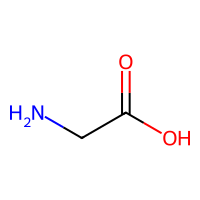
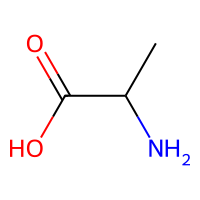
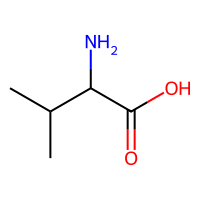
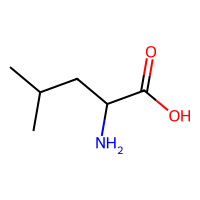
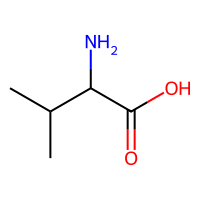

In [17]:
import pandas as pd

rows = []
for code, (name, smiles) in amino_data.items():
    codons = amino_to_codons.get(code, [])
    mol = Chem.MolFromSmiles(smiles)
    rows.append((name, mol, ", ".join(codons)))

df = pd.DataFrame(rows, columns=["Amino Acid", "Structure", "Codons"])
df.head()


#### Output Grid of Images


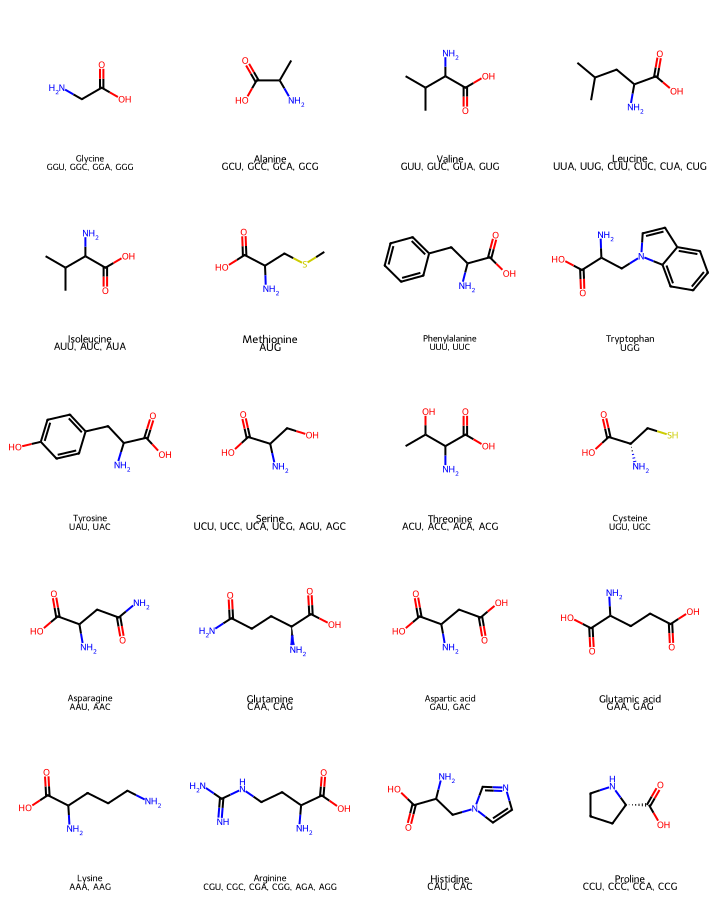

In [18]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(df["Structure"].tolist(),
                     legends=[f"{row['Amino Acid']}\n{row['Codons']}" for _, row in df.iterrows()],
                     molsPerRow=4, subImgSize=(180,180))


#### Output DataFrame with Molecule Structures

,Amino Acid,Structure,Codons
0,Glycine,,"GGU, GGC, GGA, GGG"
1,Alanine,,"GCU, GCC, GCA, GCG"
2,Valine,,"GUU, GUC, GUA, GUG"
3,Leucine,,"UUA, UUG, CUU, CUC, CUA, CUG"
4,Isoleucine,,"AUU, AUC, AUA"
5,Methionine,,AUG
6,Phenylalanine,,"UUU, UUC"
7,Tryptophan,,UGG
8,Tyrosine,,"UAU, UAC"
9,Serine,,"UCU, UCC, UCA, UCG, AGU, AGC"

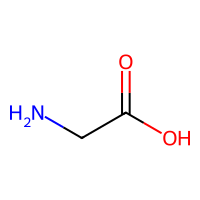
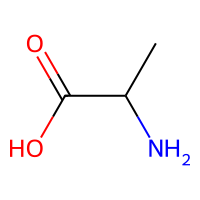
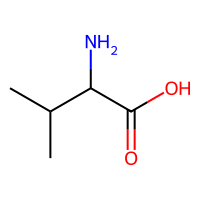
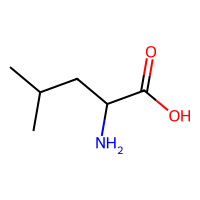
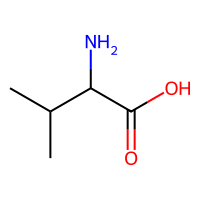
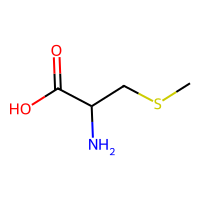
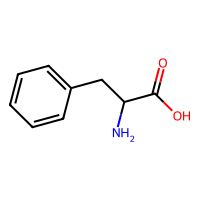
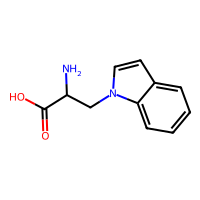
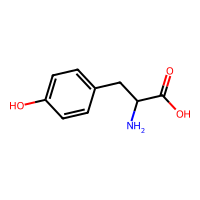
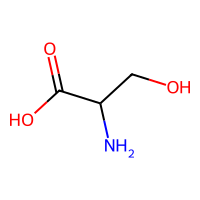
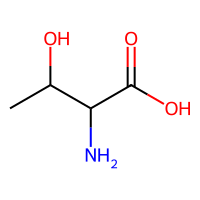
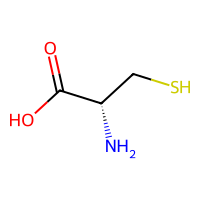
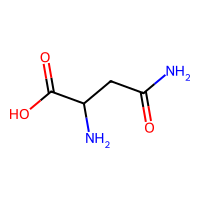
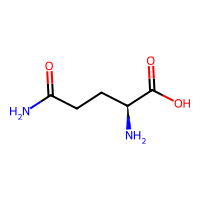
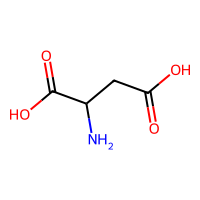
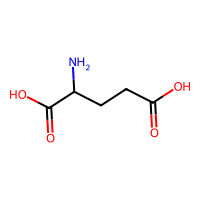
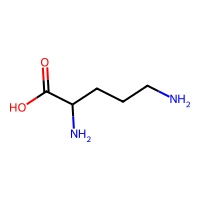
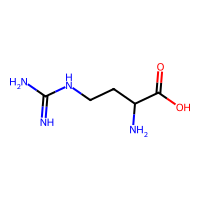
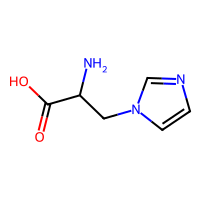
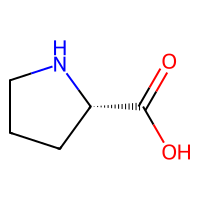

In [19]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True   # use SVG for crisp images
IPythonConsole.molSize = (150, 150)    # set molecule image size
PandasTools.ChangeMoleculeRendering(renderer='SVG')
PandasTools.RenderImagesInAllDataFrames(images=True)
df

# 2. Anticodons and Translation
Once the genetic code is transcribed into messenger RNA (mRNA), the next step is to translate that sequence into a protein. Translation happens in the cytoplasm, where large molecular complexes called ribosomes act as molecular machines that “read” the mRNA three bases at a time.

## 1. What Are Anticodons?

Each codon on the mRNA corresponds to one amino acid, but the ribosome itself doesn’t know which one. Instead, it relies on specialized adaptor molecules called transfer RNAs (tRNAs). Each tRNA has an anticodon — a three-base sequence that is complementary to a codon on the mRNA, and an attached amino acid that corresponds to that codon

When the anticodon of a tRNA pairs with its complementary codon on the mRNA, the ribosome links the amino acid it carries to the growing polypeptide chain.

| mRNA Codon | tRNA Anticodon | Amino Acid Carried |
| :------------: | :----------------: | :--------------------- |
|       AUG      |         UAC        | Methionine             |
|       UUU      |         AAA        | Phenylalanine          |
|       GGC      |         CCG        | Glycine                |

This base pairing follows the same rules as in DNA, except that uracil (U) replaces thymine (T) in RNA.

## 2. Wobble in Base Pairs
The pairing between a codon and its anticodon is not always exact. Because there are 61 sense codons but fewer than 61 distinct tRNAs, cells make use of wobble base pairing, a term introduced by Francis Crick to describe flexibility in the third position of the codon. This flexibility allows a single tRNA to recognize several codons that differ only at that final base, explaining much of the redundancy (degeneracy) of the genetic code. In most cases, variation occurs at the third base, but a few amino acids—such as leucine, serine, and arginine—show differences in other positions as well.

The short Python activity below explores this pattern computationally, identifying which codons for each amino acid vary only in the third position and which vary elsewhere.

In [7]:
from Bio.Data import CodonTable
import pandas as pd

# Load the standard RNA codon table
standard_table = CodonTable.unambiguous_rna_by_name["Standard"]

# Build codon → amino acid dictionary (including stop codons)
codon_to_aa = {codon: aa for codon, aa in standard_table.forward_table.items()}
for stop in standard_table.stop_codons:
    codon_to_aa[stop] = "Stop"

# Group codons by amino acid
aa_to_codons = {}
for codon, aa in codon_to_aa.items():
    aa_to_codons.setdefault(aa, []).append(codon)

# Helper function to detect which positions vary among codons
def varying_positions(codons):
    if len(codons) == 1:
        return []
    positions = []
    for i in range(3):
        bases = {c[i] for c in codons}
        if len(bases) > 1:
            positions.append(i+1)
    return positions

# Analyze codon variation by amino acid
rows = []
for aa, codons in aa_to_codons.items():
    positions = varying_positions(codons)
    pattern = "Only 3rd" if positions == [3] else ("1st/2nd also" if positions else "Single codon")
    rows.append((aa, ", ".join(sorted(codons)), len(codons), pattern))

df = pd.DataFrame(rows, columns=["Amino Acid", "Codons", "Count", "Variation Pattern"])
df.sort_values("Amino Acid", inplace=True)
df.reset_index(drop=True, inplace=True)

df


,Amino Acid,Codons,Count,Variation Pattern
0,A,"GCA, GCC, GCG, GCU",4,Only 3rd
1,C,"UGC, UGU",2,Only 3rd
2,D,"GAC, GAU",2,Only 3rd
3,E,"GAA, GAG",2,Only 3rd
4,F,"UUC, UUU",2,Only 3rd
5,G,"GGA, GGC, GGG, GGU",4,Only 3rd
6,H,"CAC, CAU",2,Only 3rd
7,I,"AUA, AUC, AUU",3,Only 3rd
8,K,"AAA, AAG",2,Only 3rd
9,L,"CUA, CUC, CUG, CUU, UUA, UUG",6,1st/2nd also


# 3. Translation: From RNA to Protein
The process of translation converts the genetic message carried by messenger RNA (mRNA) into a chain of amino acids — the building blocks of proteins. This is the final step in the central flow of genetic information:

$$DNA  → RNA → Protein $$

Inside the cytoplasm, a large molecular complex called the ribosome reads the mRNA three bases at a time. Each triplet, or codon, specifies one amino acid, which is delivered by a transfer RNA (tRNA) with a complementary anticodon. The ribosome then links these amino acids together in sequence, forming a polypeptide that will fold into a functional protein.

Translation occurs in three stages:

| **Stage**       | **Description**                                                                                                                           |
| :-------------- | :---------------------------------------------------------------------------------------------------------------------------------------- |
| **Initiation**  | The ribosome binds to the mRNA near the start codon (AUG), where a tRNA carrying methionine binds to begin the process.           |
| **Elongation**  | The ribosome moves along the mRNA, joining amino acids together via peptide bonds as each codon is matched by its corresponding tRNA. |
| **Termination** | When a stop codon (UAA, UAG, or UGA) enters the ribosome, a release factor binds, freeing the completed polypeptide chain.|

## BioPython Activity: Simulating Translation

Translation is a decoding process: the ribosome converts information written in one molecular language (nucleotides) into another (amino acids). We can simulate this same decoding step using Biopython. The next activity walks through this process computationally, using Biopython’s sequence tools to perform what the ribosome does in nature: read codons, map them to amino acids, and stop at a termination signal.

In [8]:
# Define mRNA sequence
from Bio.Seq import Seq

# Define an example mRNA sequence
mRNA_seq = Seq("AUGUUUGGCUACUGA")

print("mRNA Sequence:", mRNA_seq)


mRNA Sequence: AUGUUUGGCUACUGA


In [9]:
# Translate the RNA sequence into a protein
protein_seq = mRNA_seq.translate(to_stop=True)

print("Translated Protein Sequence:", protein_seq)

Translated Protein Sequence: MFGY


Here:

* `AUG` → Methionine (M) → start codon
* `UUU` → Phenylalanine (F)
* `GGC` → Glycine (G)
* `UAC` → Tyrosine (Y)
* `UGA` → Stop codon → ends translation


# 4. Proteins: From Polypeptides to Function
Once translation is complete, the ribosome releases a polypeptide chain, a linear sequence of amino acids joined by peptide bonds. But this chain is not yet a functioning protein, it must fold into a specific three-dimensional shape, guided by the chemical properties of its amino acids. 

## Levels of Protein Structure

| **Level**      | **Description**                                       | **Key Bonds / Forces**                                   |
| :------------- | :---------------------------------------------------- | :------------------------------------------------------- |
| **Primary**    | The linear sequence of amino acids (polypeptide)      | Covalent peptide (amide) bonds                           |
| **Secondary**  | Local folding patterns such as α-helices and β-sheets | Hydrogen bonds between backbone atoms                    |
| **Tertiary**   | The overall 3D shape of one polypeptide chain         | Hydrophobic interactions, ionic bonds, disulfide bridges |
| **Quaternary** | Assembly of multiple polypeptide subunits             | Same as tertiary + subunit interfaces                    |

The Chemistry Behind Folding

Protein folding is driven by energetics, the molecule seeks the conformation that minimizes its overall free energy.
The folding pathway is primarily influenced by the side chains (R-groups) of the amino acids:
   * **Hydrophobic residues** (e.g., leucine, phenylalanine, valine) cluster toward the interior of the protein, away from water.
   * **Hydrophilic and charged residues** (e.g., serine, aspartic acid, lysine) tend to orient outward, where they can form hydrogen bonds or ionic interactions with surrounding water molecules or other macromolecules.
   * **Cysteine residues** can form disulfide bridges, adding covalent stability to the folded structure.

This delicate interplay of hydrophobic collapse, electrostatic interactions, and hydrogen bonding determines how a linear chain of amino acids becomes a functional three-dimensional protein. In membrane-associated proteins, these same principles apply within a different environment: hydrophobic side chains stabilize regions buried in the lipid bilayer, while hydrophilic domains extend into the aqueous cytoplasm or extracellular space. Ultimately, the precise arrangement of these forces dictates a protein’s shape, and its shape determines its function—whether as an enzyme, receptor, transporter, or structural element of the cell.

## Activity: Amino Acid Chemistry with RDKit and SMARTS

The following activity builds on your earlier SMARTS primer. Here, you’ll use RDKit to visualize amino acids and identify functional groups in each structure using SMARTS pattern matching.

The code provided below:

* Uses the SMARTS dictionary from the earlier activity to detect common functional groups,
* Classifies amino acids as hydrophobic, hydrophilic, or charged, and
* Visualizes each amino acid in a Pandas DataFrame with highlighted functional groups.

### Student Challenge
There are several issues with the current code. Your task is to diagnose and fix them.

1. Every amino acid contains a *backbone* carboxylic acid (–COOH) and amine (–NH₂) group attached to the α-carbon. These are part of the peptide backbone, they are *not* unique to any amino acid and disappear when amino acids are linked into peptides.

2. We are interested only in functional groups on the R group (the side chain attached to the α-carbon), since these are what distinguish amino acids chemically.

3. Currently, the SMARTS patterns highlight all amine and carboxylic acid groups, including those in the backbone. Your goal is to modify the SMARTS logic so that it ignores the backbone and only highlights side-chain (R-group) functional groups.

**Your Task**

1. Examine the SMARTS dictionary used in the code below.
   Using recursive SMARTS (`$()` syntax) and the logical NOT operator (`!`), define patterns that:

   * Exclude the carboxylic acid directly attached to the α-carbon (the backbone COOH), and
   * Exclude the amine attached to the α-carbon (the backbone NH₂).

   In other words, your updated SMARTS should:

   * Only highlight R-group amines for Lysine, Arginine, and Histidine, and
   * Only highlight R-group carboxylic acids for Aspartic acid and Glutamic acid.

2. Test your patterns by altering the code so it works as specified
   Which SMARTS patterns successfully exclude the backbone groups but still identify R-group functionalities?

3. Bonus:
   * Can you write one recursive SMARTS that identifies *only* the α-carbon and its immediate substituents? That is, programmatic context sensitive substructure matching that only matches a pattern when it is attached to a specific type of atom, (the alpha carbon of an amino acid).

,Amino Acid,SMILES,Functional Groups,Structure,Hydrophobicity
0,Glycine,NCC(=O)O,"Amine (primary/secondary/tertiary), Carboxylic...",,Neutral
1,Alanine,CC(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
2,Valine,CC(C)C(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
3,Leucine,CC(C)CC(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
4,Isoleucine,CCC(C)C(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
5,Methionine,CSCC(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
6,Phenylalanine,C1=CC=CC=C1CC(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
7,Tryptophan,C1=CC=C2C(=C1)C=CN2CC(C(=O)O)N,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophobic
8,Tyrosine,C1=CC(=CC=C1CC(C(=O)O)N)O,"Amine (primary/secondary/tertiary), Carboxylic...",,Hydrophilic
9,Serine,C(CO)C(=O)O,"Carboxylic acid, Alcohol",,Hydrophilic

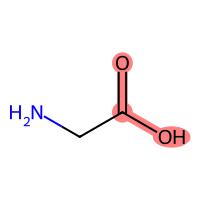
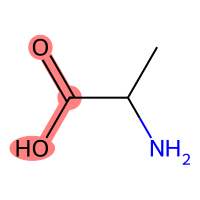
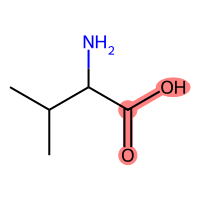
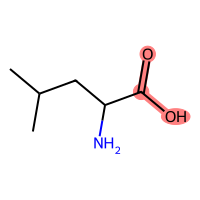
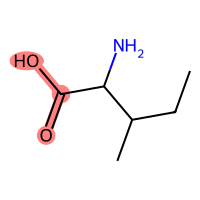
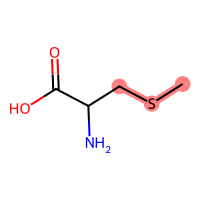
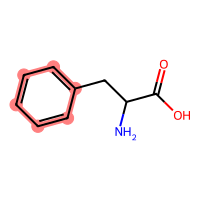
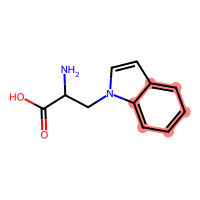
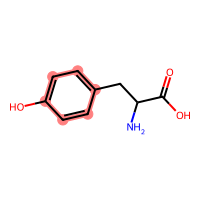
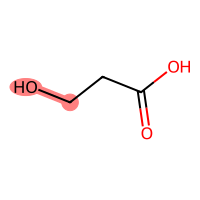
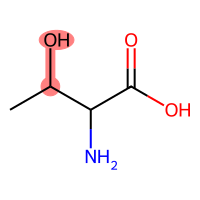
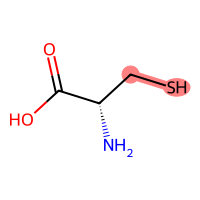
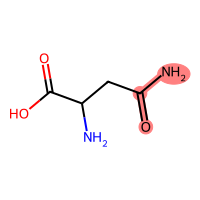
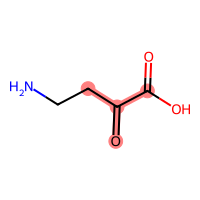
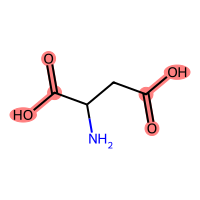
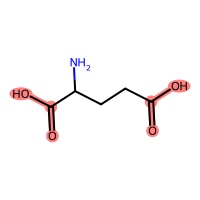
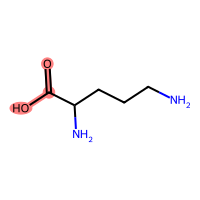
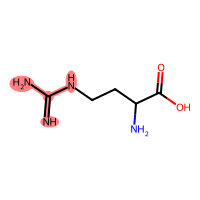
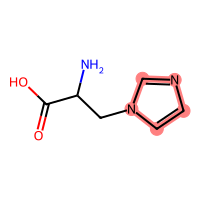
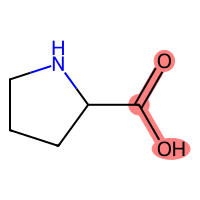

In [11]:
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

# --- RDKit display setup ---
IPythonConsole.ipython_useSVG = True
PandasTools.RenderImagesInAllDataFrames(images=True)
PandasTools.ChangeMoleculeRendering(renderer='SVG')

# --- Amino acid SMILES (validated) ---
amino_data = {
    "Glycine":      "NCC(=O)O",
    "Alanine":      "CC(C(=O)O)N",
    "Valine":       "CC(C)C(C(=O)O)N",
    "Leucine":      "CC(C)CC(C(=O)O)N",
    "Isoleucine":   "CCC(C)C(C(=O)O)N",
    "Methionine":   "CSCC(C(=O)O)N",
    "Phenylalanine":"C1=CC=CC=C1CC(C(=O)O)N",
    "Tryptophan":   "C1=CC=C2C(=C1)C=CN2CC(C(=O)O)N",
    "Tyrosine":     "C1=CC(=CC=C1CC(C(=O)O)N)O",
    "Serine":       "C(CO)C(=O)O",
    "Threonine":    "CC(O)C(C(=O)O)N",
    "Cysteine":     "C([C@@H](C(=O)O)N)S",
    "Asparagine":   "NC(=O)CC(C(=O)O)N",
    "Glutamine":    "NCCC(=O)C(=O)O",
    "Aspartic acid":"OC(=O)CC(C(=O)O)N",
    "Glutamic acid":"OC(=O)CCC(C(=O)O)N",
    "Lysine":       "NCCCC(C(=O)O)N",
    "Arginine":     "N=C(N)NCCC(C(=O)O)N",
    "Histidine":    "C1=CN=CN1CC(C(=O)O)N",
    "Proline":      "C1CC(NC1)C(=O)O"
}

# --- SMARTS dictionary (from your earlier primer) ---
functional_groups = {
    "Amine (primary/secondary/tertiary)": "[NX3;!$(NC=O);!$([N]~[!#1;!#6])]",
    "Carboxylic acid": "[CX3](=O)[OX2H1]",
    "Amide": "[CX3](=O)[NX3]",
    "Alcohol": "[OX2H][CX4]",
    "Phenol": "c[OX2H]",
    "Thiol": "[SX2H]",
    "Thioether": "[SX2][CX4]",
    "Ether": "[OD2]([#6])[#6]",
    "Ketone": "[#6][CX3](=O)[#6]",
    "Aldehyde": "[CX3H1](=O)[#6]",
    "Carboxylate (deprotonated acid)": "[CX3](=O)[O-]",
    "Guanidinium": "NC(=[NH2+])N",
    "Amidinium": "NC(=N)N",
    "Imidazole": "c1ncnc1",
    "Indole": "c1ccc2c(c1)[nH]cc2",
    "Amine (aromatic)": "c[NX3;!$(NC=O)]",
    "Disulfide": "[SX2][SX2]",
    "Thioester": "[CX3](=O)[SX2]",
    "Ester": "[CX3](=O)[OX2][CX4]",
    "Carbamate": "[NX3][CX3](=O)[OX2]",
    "Aromatic ring": "a1aaaaa1"
}

# --- Hydrophobicity classes (simplified) ---
hydro_class = {
    "Hydrophobic": ["Alanine", "Valine", "Leucine", "Isoleucine", "Methionine", "Phenylalanine", "Tryptophan", "Proline"],
    "Hydrophilic": ["Serine", "Threonine", "Asparagine", "Glutamine", "Cysteine", "Tyrosine"],
    "Charged": ["Aspartic acid", "Glutamic acid", "Lysine", "Arginine", "Histidine"]
}

def classify(name):
    for k,v in hydro_class.items():
        if name in v:
            return k
    return "Neutral"

# --- Build the DataFrame ---
rows = []
for name, smiles in amino_data.items():
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"⚠️ Skipping invalid SMILES: {name}")
        continue

    found_groups = []
    highlight_atoms = set()

    # Search for each functional group in this molecule
    for group_name, smarts in functional_groups.items():
        patt = Chem.MolFromSmarts(smarts)
        if patt and mol.HasSubstructMatch(patt):
            found_groups.append(group_name)
            for match in mol.GetSubstructMatches(patt):
                highlight_atoms.update(match)

    # Mark highlight atoms for Jupyter rendering
    mol.SetProp("_highlightAtomList", str(list(highlight_atoms)))

    rows.append((name, smiles, ", ".join(found_groups), mol, classify(name)))

df = pd.DataFrame(rows, columns=["Amino Acid", "SMILES", "Functional Groups", "Structure", "Hydrophobicity"])

# --- Display ---
df
